In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing, AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_csv('../practical8/IPG2211A2N.csv', index_col='DATE', parse_dates=True)
df

,IPG2211A2N
DATE,
1939-01-01,3.3336
1939-01-02,3.3591
1939-01-03,3.4354
1939-01-04,3.4608
1939-01-05,3.4608
...,...
2024-01-03,98.3225
2024-01-04,90.4548
2024-01-05,95.6632


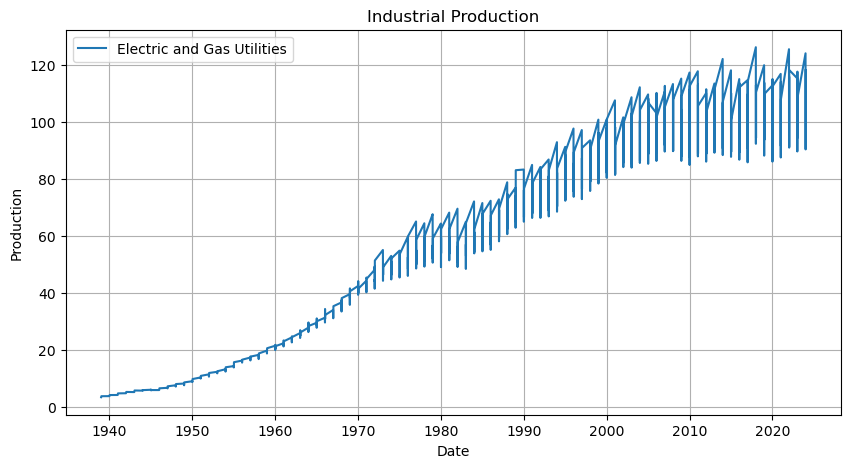

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df, label="Electric and Gas Utilities")
plt.title("Industrial Production")
plt.xlabel("Date")
plt.ylabel("Production")
plt.legend()
plt.grid()
plt.show()

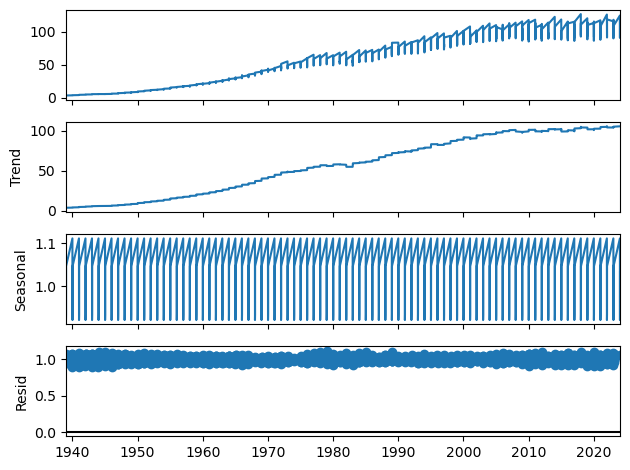

In [12]:
decompos_results = seasonal_decompose(df, period=12, model='multiplicative')
decompos_results.plot()
plt.show()

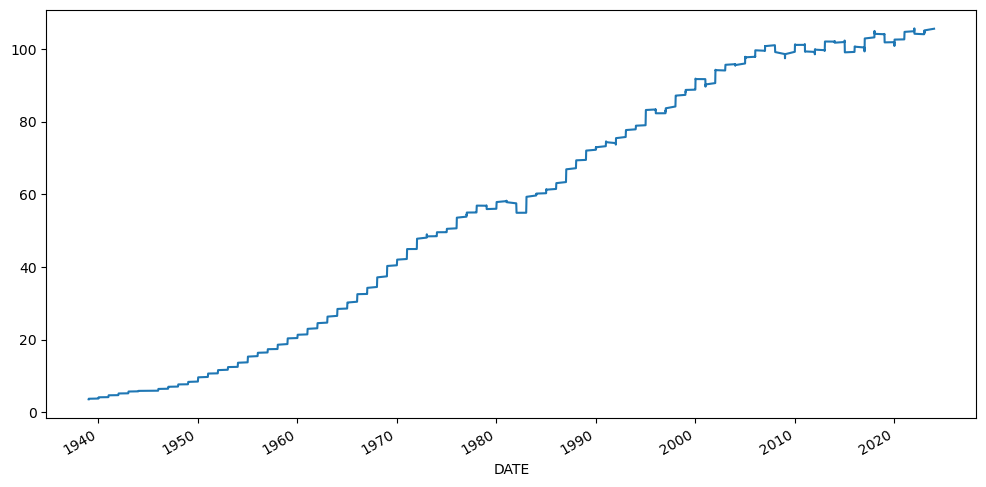

In [13]:
# Trend
plt.figure(figsize=(12, 6))
decompos_results = seasonal_decompose(df, period=12, model='multiplicative')
decompos_results.trend.plot()
plt.show()

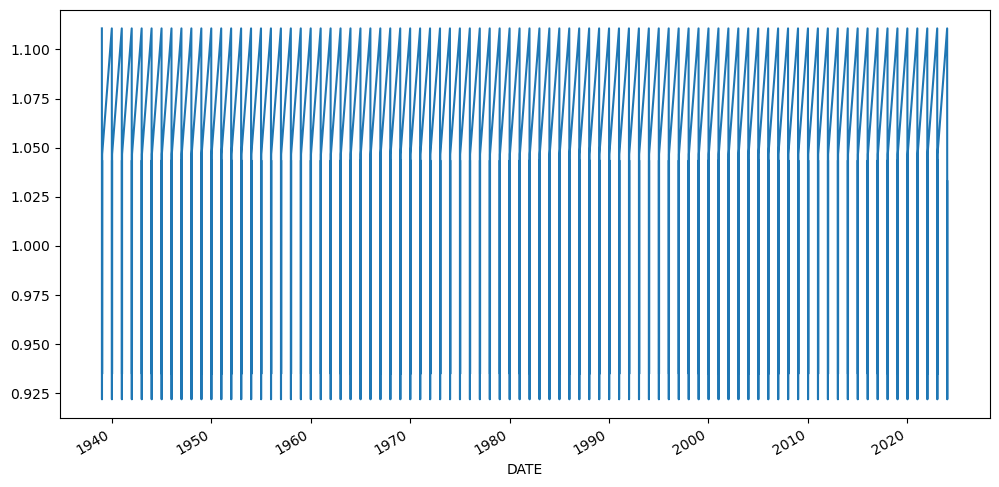

In [14]:
# Seasonal
plt.figure(figsize=(12, 6))
decompos_results = seasonal_decompose(df, period=12, model='multiplicative')
decompos_results.seasonal.plot()
plt.show()

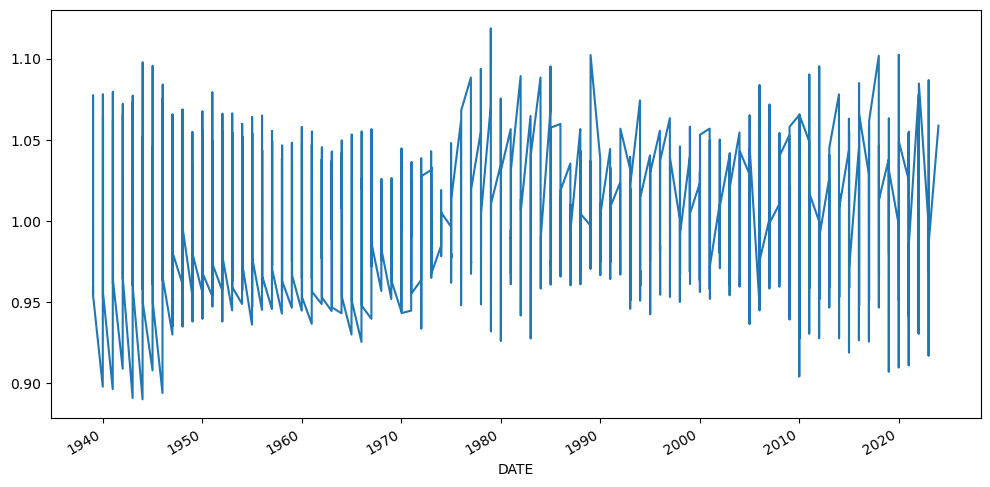

In [15]:
# Residual
plt.figure(figsize=(12, 6))
decompos_results = seasonal_decompose(df, period=12, model='multiplicative')
decompos_results.resid.plot()
plt.show()

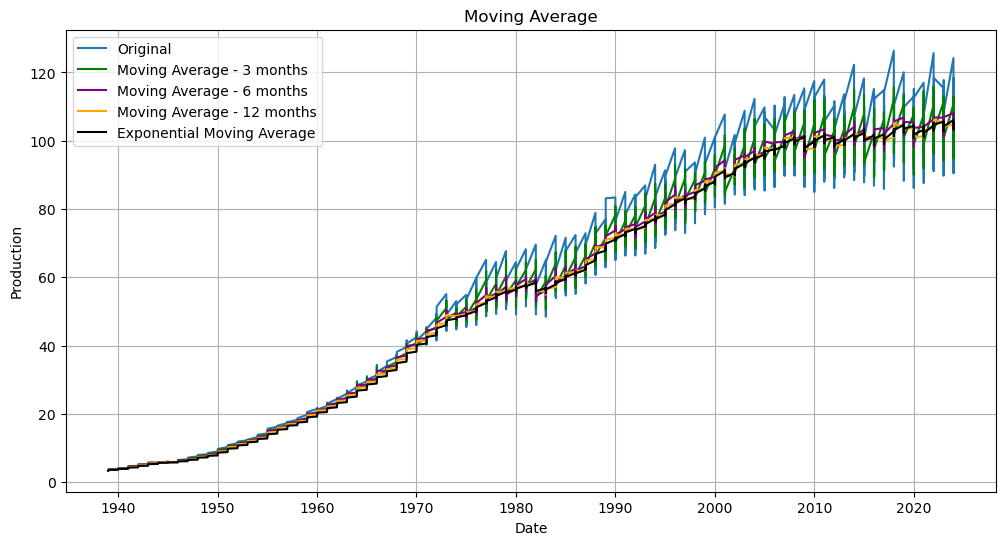

In [16]:
plt.figure(figsize=(12, 6))
df1 = df.copy()

df1["MA_3"] = df1["IPG2211A2N"].rolling(window=3).mean()
df1["MA_6"] = df1["IPG2211A2N"].rolling(window=6).mean()
df1["MA_12"] = df1["IPG2211A2N"].rolling(window=12).mean()
df1["EMA"] = df1["IPG2211A2N"].ewm(com=10).mean()

plt.plot(df1["IPG2211A2N"], label="Original")
plt.plot(df1["MA_3"], label="Moving Average - 3 months", color="green")
plt.plot(df1["MA_6"], label="Moving Average - 6 months", color="purple")
plt.plot(df1["MA_12"], label="Moving Average - 12 months", color="orange")
plt.plot(df1["EMA"], label="Exponential Moving Average", color="black")

plt.title("Moving Average")
plt.xlabel("Date")
plt.ylabel("Production")
plt.legend()
plt.grid()
plt.show()

In [47]:
df2 = pd.read_csv('../practical10/CarPrice_Assignment.csv')
df2['time_index'] = np.arange(len(df2))
df2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,time_index
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,3
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,200
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,201
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,202
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,203


In [50]:
df2['price'] = pd.to_numeric(df2['price'], errors='coerce')
df2.dropna(subset=['price'], inplace=True)

In [51]:
exp_model = ExponentialSmoothing(df2['price'], seasonal=None, trend=None, damped_trend=False).fit(smoothing_level=0.5)

In [54]:
exp_forecast = exp_model.forecast(steps=12)

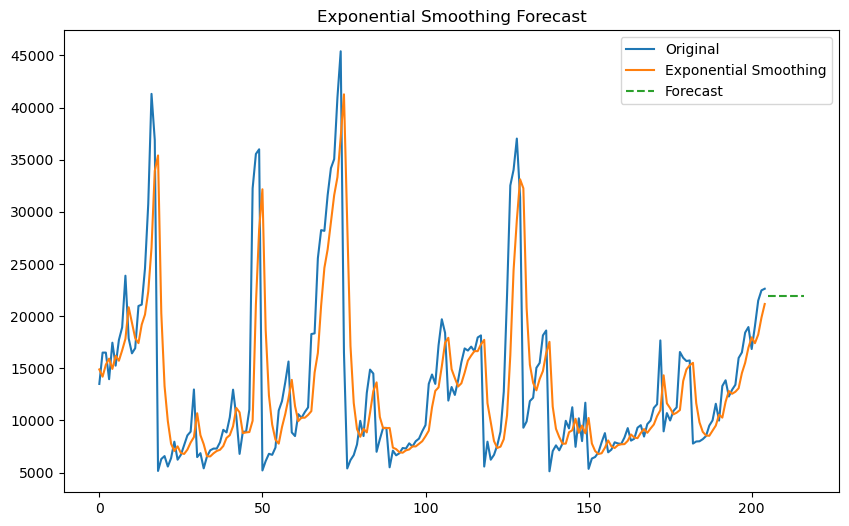

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(df2['time_index'], df2['price'], label='Original')
plt.plot(df2['time_index'], exp_model.fittedvalues, label='Exponential Smoothing')
plt.plot(range(len(df2), len(df2) + 12), exp_forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.show()

In [57]:
linear_model = LinearRegression()
linear_model.fit(df2[['time_index']], df2['price'])

LinearRegression()

In [58]:
df2['linear_trend'] = linear_model.predict(df2[['time_index']])

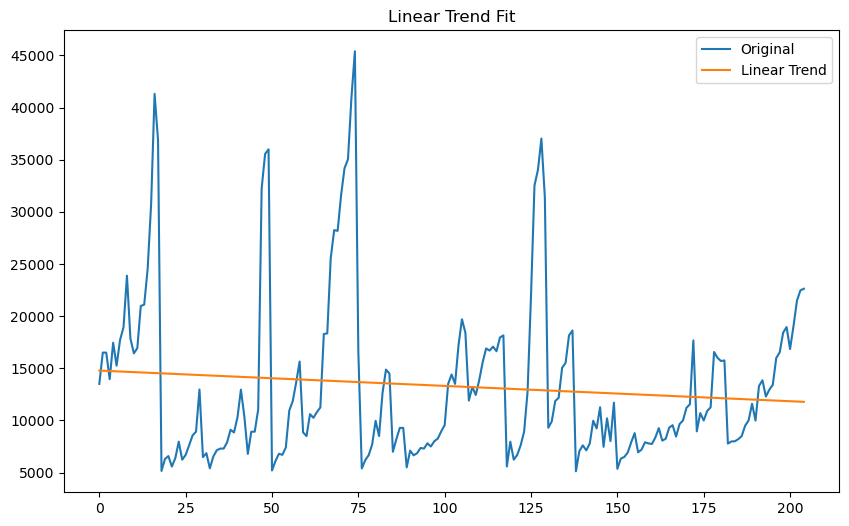

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(df2['time_index'], df2['price'], label='Original')
plt.plot(df2['time_index'], df2['linear_trend'], label='Linear Trend')
plt.legend()
plt.title('Linear Trend Fit')
plt.show()

In [60]:
ar_model = AutoReg(df2['price'], lags=5).fit()

In [61]:
ar_forecast = ar_model.predict(start=len(df2), end=len(df2) + 11)

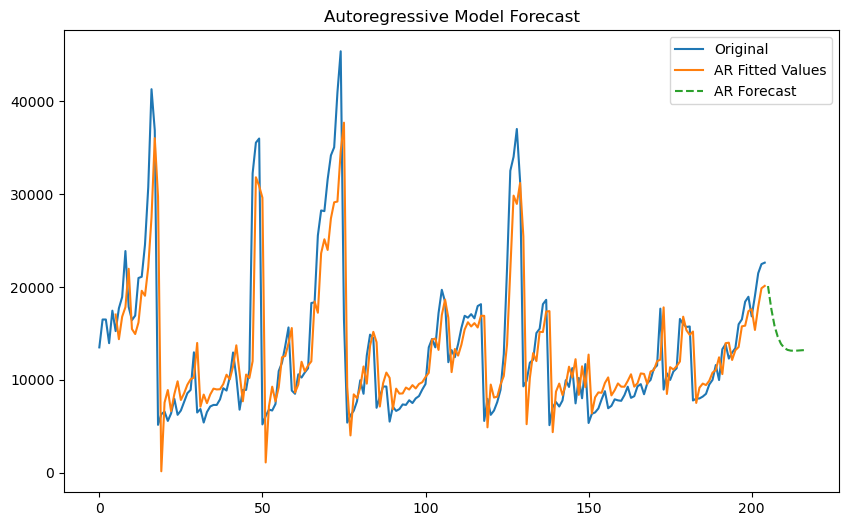

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(df2['time_index'], df2['price'], label='Original')
plt.plot(ar_model.fittedvalues.index, ar_model.fittedvalues, label='AR Fitted Values')
plt.plot(range(len(df2), len(df2) + 12), ar_forecast, label='AR Forecast', linestyle='--')
plt.legend()
plt.title('Autoregressive Model Forecast')
plt.show()

In [67]:
rmse = sqrt(mean_squared_error(ar_model.fittedvalues[:12], ar_forecast))
rmse

6290.457631968487

In [35]:
train = df['IPG2211A2N'][:len(df['IPG2211A2N'])-7]
test = df['IPG2211A2N'][len(df['IPG2211A2N'])-7:]

In [30]:
adfuller(df['IPG2211A2N'], autolag='AIC')

(-0.7506157906656378,
 0.8331998510446086,
 22,
 1004,
 {'1%': -3.436879978012783,
  '5%': -2.86442302475405,
  '10%': -2.568305057578451},
 4345.632501197902)

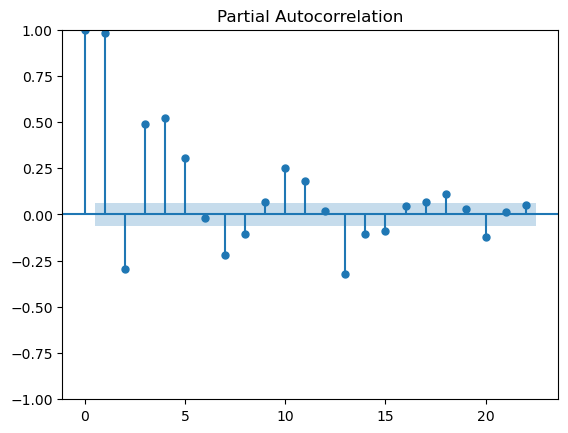

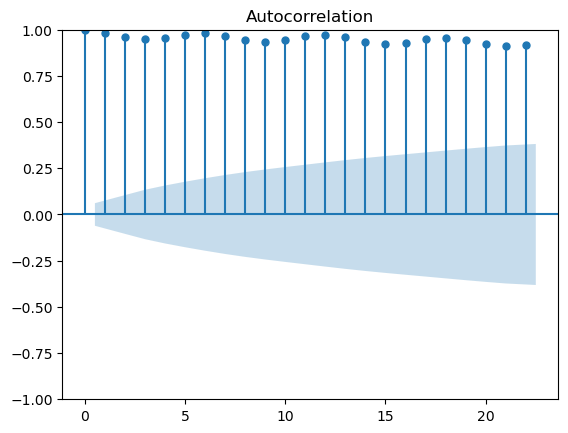

In [32]:
pacf = plot_pacf(df['IPG2211A2N'], lags=22)
pcf = plot_acf(df['IPG2211A2N'], lags=22)

In [36]:
autoreg = AutoReg(train, lags=5).fit()

C:\Users\harsh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
autoreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                 1020
Model:                     AutoReg(5)   Log Likelihood               -2565.161
Method:               Conditional MLE   S.D. of innovations              3.029
Date:                Fri, 22 Nov 2024   AIC                           5144.322
Time:                        08:37:16   BIC                           5178.781
Sample:                             5   HQIC                          5157.409
                                 1020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3417      0.179      1.907      0.057      -0.010       0.693
IPG2211A2N.L1     0.9681      0.029     33.626      0.000       0.912       1.024
IPG2211A2N.L2    -0.3628      0.042     -8.698      0.000      -0.445      -0.281
IPG2211A2N.L3    -0.1253      0.043     -2.909      0.004      -0.210      -0.041
IPG2211A2N.L4     0.1175      0.042      2.813      0.005       0.036       0.199
IPG2211A2N.L5     0.4007      0.029     13.874      0.000       0.344       0.457
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2            0.5186           -0.8951j            1.0344           -0.1664
AR.3            0.5186           +0.8951j            1.0344            0.1664
AR.4           -1.1656           -0.9857j            1.5265           -0.3883
AR.5           -1.1656           +0.9857j            1.5265            0.3883
-----------------------------------------------------------------------------
"""

In [68]:
import statsmodels.api as sm

In [69]:
df3 = pd.read_csv('../practical9/CarPrice_Assignment.csv')
df3

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [74]:
X_1 = df3['horsepower']
y_1 = df3['citympg']

X_1 = sm.add_constant(X_1)

model_1 = sm.OLS(y_1, X_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                citympg   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     364.6
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           3.32e-47
Time:                        10:04:11   Log-Likelihood:                -570.04
No. Observations:                 205   AIC:                             1144.
Df Residuals:                     203   BIC:                             1151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0246      0.773     50.473      0.000      37.500      40.549
horsepower    -0.1326      0.007    -19.094      0.000      -0.146      -0.119
==============================================================================
Omnibus:                       62.125   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.205
Skew:                           1.258   Prob(JB):                     6.07e-41
Kurtosis:                       6.918   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
X_2 = df3['horsepower']
y_2 = df3['highwaympg']

X_2 = sm.add_constant(X_2)

model_2 = sm.OLS(y_2, X_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             highwaympg   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     296.7
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.42e-41
Time:                        10:04:48   Log-Likelihood:                -593.61
No. Observations:                 205   AIC:                             1191.
Df Residuals:                     203   BIC:                             1198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.7224      0.867     51.559      0.000      43.012      46.433
horsepower    -0.1342      0.008    -17.224      0.000      -0.150      -0.119
==============================================================================
Omnibus:                       60.726   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.173
Skew:                           1.220   Prob(JB):                     1.02e-40
Kurtosis:                       6.950   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

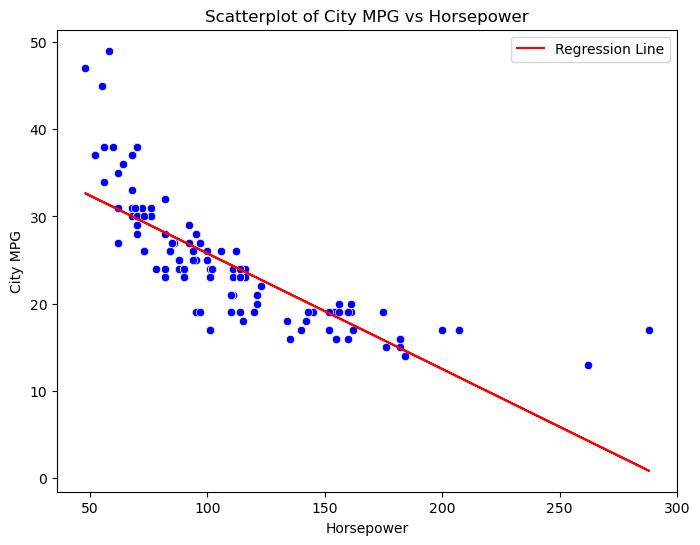

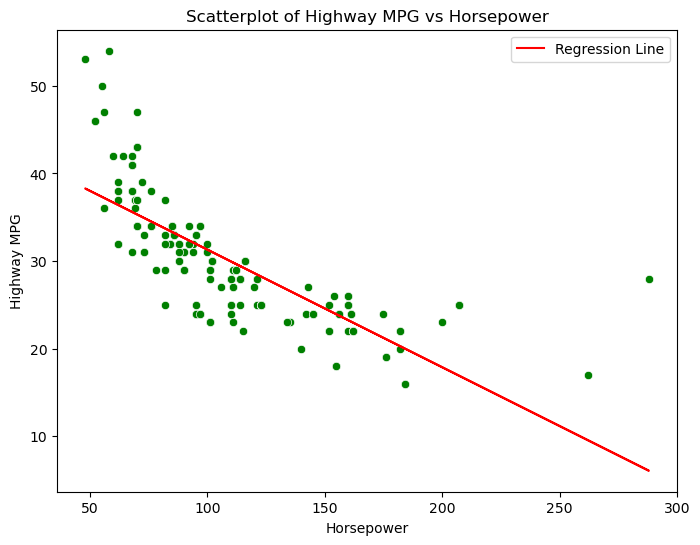

In [78]:
# Scatterplot for citympg vs. horsepower
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df3['horsepower'], y=df3['citympg'], color='blue')
plt.plot(df3['horsepower'], model_1.predict(sm.add_constant(df3['horsepower'])), color='red', label='Regression Line')
plt.title('Scatterplot of City MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('City MPG')
plt.legend()
plt.show()

# Scatterplot for highwaympg vs. horsepower
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df3['horsepower'], y=df3['highwaympg'], color='green')
plt.plot(df3['horsepower'], model_2.predict(sm.add_constant(df3['horsepower'])), color='red', label='Regression Line')
plt.title('Scatterplot of Highway MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Highway MPG')
plt.legend()
plt.show()

In [79]:
X_citympg = sm.add_constant(df3['citympg'])
model_price_citympg = sm.OLS(df3['price'], X_citympg).fit()
print("Model 1: price vs citympg")
print(model_price_citympg.summary())

X_highwaympg = sm.add_constant(df3['highwaympg'])
model_price_highwaympg = sm.OLS(df3['price'], X_highwaympg).fit()
print("\nModel 2: price vs highwaympg")
print(model_price_highwaympg.summary())


Model 1: price vs citympg
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           7.98e-30
Time:                        10:32:39   Log-Likelihood:                -2067.3
No. Observations:                 205   AIC:                             4139.
Df Residuals:                     203   BIC:                             4145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.44e+04   16

In [80]:
X_enginesize = df3[['enginesize']]
y_price = df3['price']

X_enginesize = sm.add_constant(X_enginesize)
model_enginesize = sm.OLS(y_price, X_enginesize).fit()

print(model_enginesize.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.35e-65
Time:                        10:34:54   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

In [81]:
X_curbweight = df3[['curbweight']]
y_price = df3['price']

X_curbweight = sm.add_constant(X_curbweight)
model_curbweight = sm.OLS(y_price, X_curbweight).fit()

print(model_curbweight.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     468.6
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.21e-54
Time:                        10:35:28   Log-Likelihood:                -2009.8
No. Observations:                 205   AIC:                             4024.
Df Residuals:                     203   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.948e+04   1543.962    -12.614      0.0

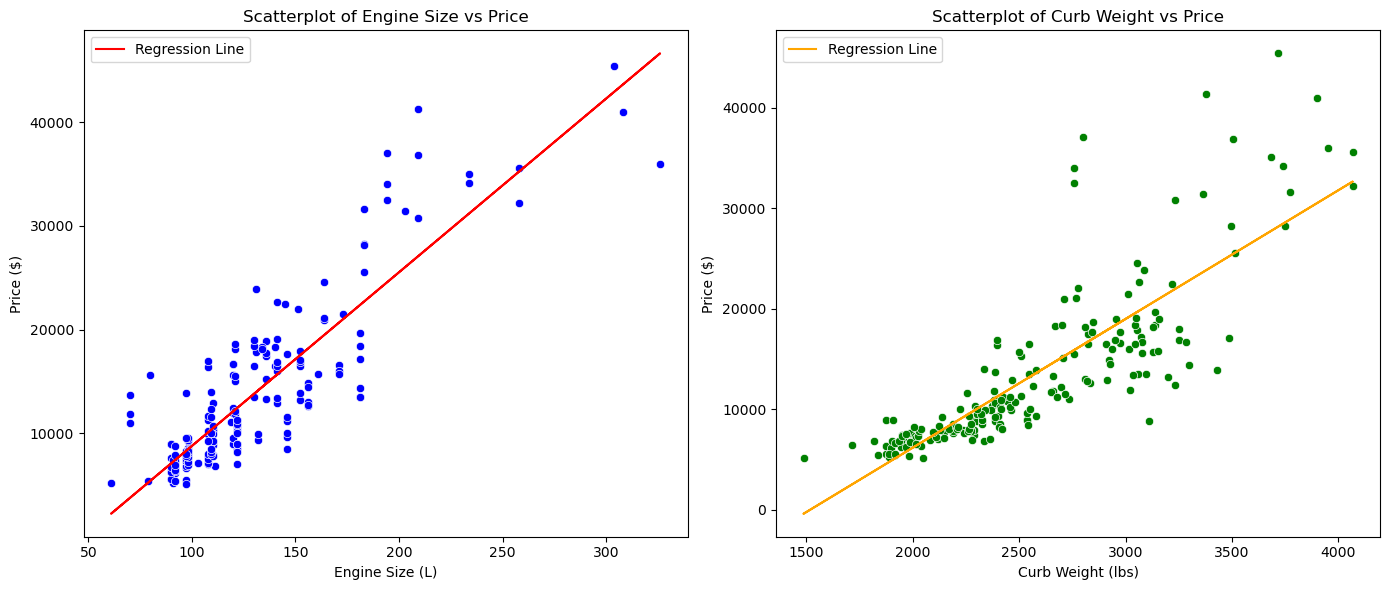

In [82]:
plt.figure(figsize=(14, 6))

# Scatterplot for Engine Size vs. Price
plt.subplot(1, 2, 1)
sns.scatterplot(x=df3['enginesize'], y=df3['price'], color='blue')
plt.plot(df3['enginesize'], model_enginesize.predict(sm.add_constant(df3['enginesize'])), color='red', label='Regression Line')
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price ($)')
plt.legend()

# Scatterplot for Curb Weight vs. Price
plt.subplot(1, 2, 2)
sns.scatterplot(x=df3['curbweight'], y=df3['price'], color='green')
plt.plot(df3['curbweight'], model_curbweight.predict(sm.add_constant(df3['curbweight'])), color='orange', label='Regression Line')
plt.title('Scatterplot of Curb Weight vs Price')
plt.xlabel('Curb Weight (lbs)')
plt.ylabel('Price ($)')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
numeric_df = df3.drop(['price', 'citympg', 'highwaympg'], axis=1).select_dtypes(include=[float, int])

independent_vars = sm.add_constant(numeric_df)

# Variance Inflation Factor (VIF) calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = independent_vars.columns
vif_data['VIF'] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]

print(vif_data)

             Feature          VIF
0              const  4372.955598
1             car_ID     1.286613
2          symboling     1.756641
3          wheelbase     8.208089
4          carlength     8.635150
5           carwidth     5.687775
6          carheight     2.310410
7         curbweight    12.838282
8         enginesize     6.247614
9          boreratio     2.182438
10            stroke     1.191061
11  compressionratio     1.551007
12        horsepower     7.503419
13           peakrpm     2.053763


In [87]:
# Residual Analysis
y_pred = model_curbweight.predict(sm.add_constant(df3['curbweight']))
residuals = y_price - y_pred
residuals

0       315.254715
1      3320.254715
2      -204.192737
3      3474.467124
4       732.991091
          ...     
200   -1512.478996
201    -555.647734
202    2358.550651
203     716.235277
204    2857.742023
Length: 205, dtype: float64

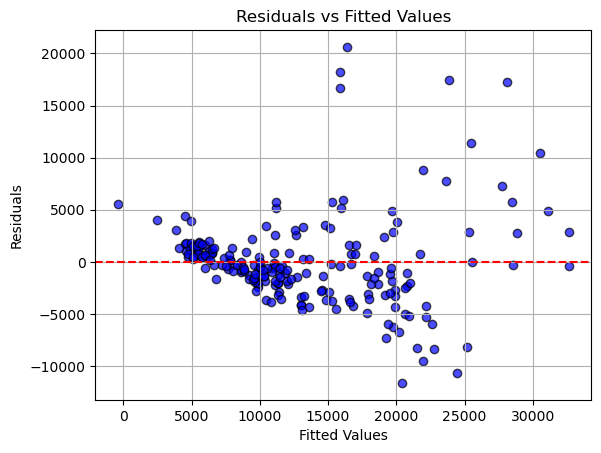

In [91]:
# Scatter plot of residuals vs. fitted values
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at 0
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

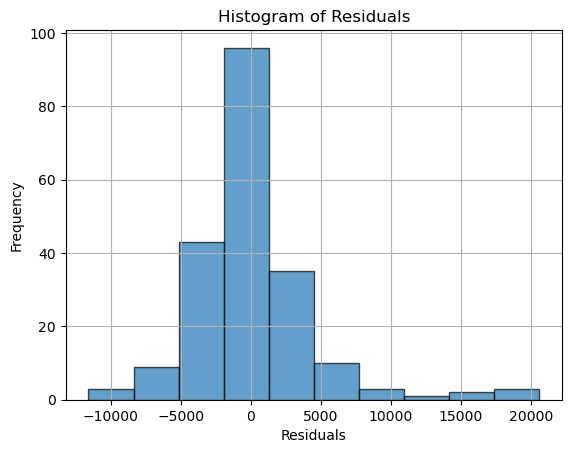

In [90]:
# Histogram of residuals
plt.hist(residuals, bins=10, edgecolor='k', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()